# Create an extractor from Twitter using API

> As long as we get our API Key, i'll use the API to save the tweets of the last 7 days (Restriction of Basic Developer Account of Twitter) then i'll save a CSV file for each ISP in México.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import csv

CONSUMER_KEY='ZGuyit1jJ0UUcqUUO67U7W0NU'
CONSUMER_SECRET='nB7CChMcChb0Ro4gWV6LkvXEYq0C5b7KimSVvkc51Z0kVAdZlG'
ACCESS_TOKEN='65531951-MrGwfLEhJ9otvdnFLXQi5qTEALr9M5vNgddfc4Q4X'
ACCESS_SECRET='1iakfsxU7fRoJjARhtei4X8YgHpp2F9hDa8tDnkcTSsVW'


auth = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)
num_tweets = 3000                  # number of tweets to retrieve
#twitter_id = "@TotalplayAyuda -filter:retweets"    # userid 
#twitter_id = "@ayudaizzi -filter:retweets"
#twitter_id = "@TELMEXSoluciona -filter:retweets"    # userid
twitter_id = "@AXTEL_SC -filter:retweets"    # userid

# Open/create a file to append data to
csvFile = open('empresa.csv', 'w') # Change the name of the file based in the ISP

#Use csv writer
csvWriter = csv.writer(csvFile)

writer = csv.DictWriter(csvFile, fieldnames = ["ID", "Date", "User", "Screen Name", "Location", "Text", "Source","Likes","RTs","Hashtags"])
writer.writeheader()

for tweet in tweepy.Cursor(api.search,
                           q = twitter_id,
                           lang = "es",
                           tweet_mode='extended').items(num_tweets):
    csvWriter.writerow([tweet.id, tweet.created_at, tweet.user.name, tweet.user.screen_name, tweet.user.location, tweet.full_text, tweet.source, tweet.favorite_count, tweet.retweet_count, tweet.entities.get('hashtags')])

csvFile.close()

# Read the CSV File and convert them to a Data Frame

>Once we've got the dataset in the CSV the next thing is reading with Python and then convert it in a Data Frame with Pandas , because the API from Twitter give us a model, it was easy to save the data as we need it, so the cleaning process for this part , it will be just convert the field "created_at" in order to be able to split the date and hours, and then convert the date to a weekly day.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

############################
#         TOTALPLAY        #
############################

data_totalplay = pd.read_csv(r'resources/totalplay.csv')
df_totalplay = pd.DataFrame(data_totalplay)
df_totalplay.head()
df_totalplay['Date'] = pd.to_datetime(df_totalplay['Date']) # convert to datetime data type
df_totalplay.sort_values(by='Date'); # Sort by date
display(df_totalplay.head(10))

############################
#            AXTEL         #
############################


data_axtel = pd.read_csv(r'resources/axtel.csv')
df_axtel = pd.DataFrame(data_axtel)
df_axtel.head()
df_axtel['Date'] = pd.to_datetime(df_axtel['Date']) # convert to datetime data type
df_axtel.sort_values(by='Date'); # Sort by date
#display(df_axtel.head(10))

############################
#          TELMEX          #
############################


data_telmex = pd.read_csv(r'resources/telmex.csv')
df_telmex = pd.DataFrame(data_telmex)
df_telmex.head()
df_telmex['Date'] = pd.to_datetime(df_telmex['Date']) # convert to datetime data type
df_telmex.sort_values(by='Date'); # Sort by date
#display(df_telmex.head(10))

############################
#           IZZI           #
############################

data_izzi = pd.read_csv(r'resources/izzi.csv')
df_izzi = pd.DataFrame(data_izzi)
df_izzi.head()
df_izzi['Date'] = pd.to_datetime(df_izzi['Date']) # convert to datetime data type
df_izzi.sort_values(by='Date'); # Sort by date
#display(df_izzi.head(10))

import datetime

data_frames = [df_totalplay,df_axtel,df_telmex,df_izzi]

for i in data_frames:
    i['fecha'] = i.Date.dt.strftime('%Y/%m/%d')
    #se split date day,month,year
    dt = pd.to_datetime(i['fecha'])
    date_list = []
    for x in dt:
        answer = x.strftime("%A")
        date_list.append(answer)

    i['weekday'] = pd.DataFrame(date_list)

    # Se separa la hora
    hour_list = []

    dt = pd.to_datetime(i['Date'])
    date_list = []
    for x in dt:
        answer = x.strftime("%H")
        hour_list.append(answer)

    i['hora'] = pd.DataFrame(hour_list)

,ID,Date,User,Screen Name,Location,Text,Source,Likes,RTs
0,1085607041631223809,2019-01-16 18:37:42,Mario Ramirez,mariorp,NaN,@TotalplayAyuda @totalplaymx @Telmex ya envie ...,Twitter Web Client,0,0
1,1085602523635945472,2019-01-16 18:19:45,Fernando,fearemid,Puebla,"@TotalplayAyuda buen día, hice una recomendaci...",Twitter for iPhone,0,0
2,1085601977969594368,2019-01-16 18:17:35,James Axton,chicodelazar,NaN,@TotalplayAyuda ayuda,Twitter for Android,0,0
3,1085600565021851648,2019-01-16 18:11:58,Dous,Dous18,NaN,"@TotalplayAyuda hola, ayer mi esposo contrato ...",Twitter for iPhone,0,0
4,1085600535686696960,2019-01-16 18:11:51,Berenice Verduzco,BereniceVerduz4,"Jalisco, México","@TotalplayAyuda Ok espero no me decepcionen, p...",Twitter for Android,0,0
5,1085596601760899073,2019-01-16 17:56:13,Brunoku,Brunoku,NaN,@TotalplayAyuda @LoreAguilarP Si por favor cám...,Twitter for Android,0,0
6,1085596429467439106,2019-01-16 17:55:32,Axel Pérez Gama,AxelPerezGama,CDMX,@TotalplayAyuda no tengo servicio de Totalplay...,Twitter for Android,0,0
7,1085593778444890112,2019-01-16 17:45:00,Berenice Verduzco,BereniceVerduz4,"Jalisco, México",@TotalplayAyuda estoy sin servicio desde hace ...,Twitter for Android,0,0
8,1085591058208108544,2019-01-16 17:34:12,Luis Salvador C.,salvadorl_1,México,.@TotalplayAyuda Hola! Quisiera saber por cuán...,Twitter for Android,0,0
9,1085588669791174657,2019-01-16 17:24:42,Carl MX,oespc,CDMX,@TotalplayAyuda @totalplaymx Y que me conteste...,Twitter for Android,0,0


# FAV's and RT's

>One of the first things that i been wondering about the data set is, how much people support the tweets from the users that are currently tweeting ?, the result is the next graphs for each company.

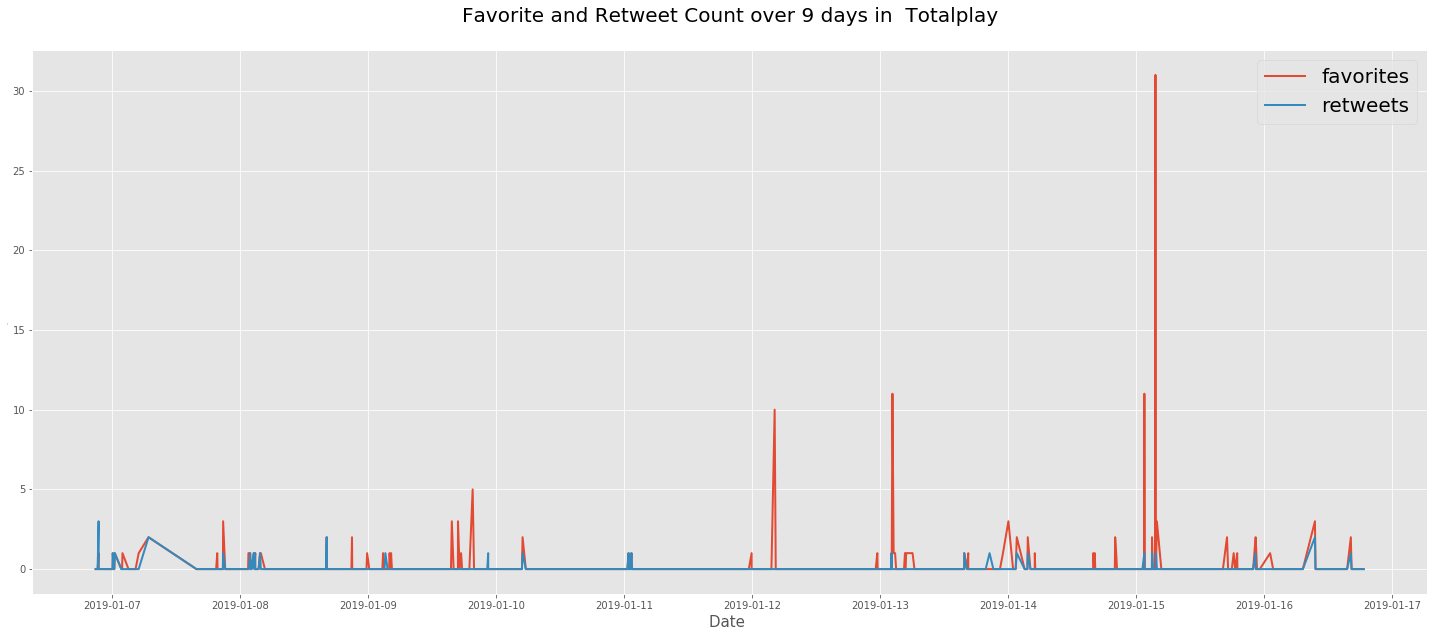

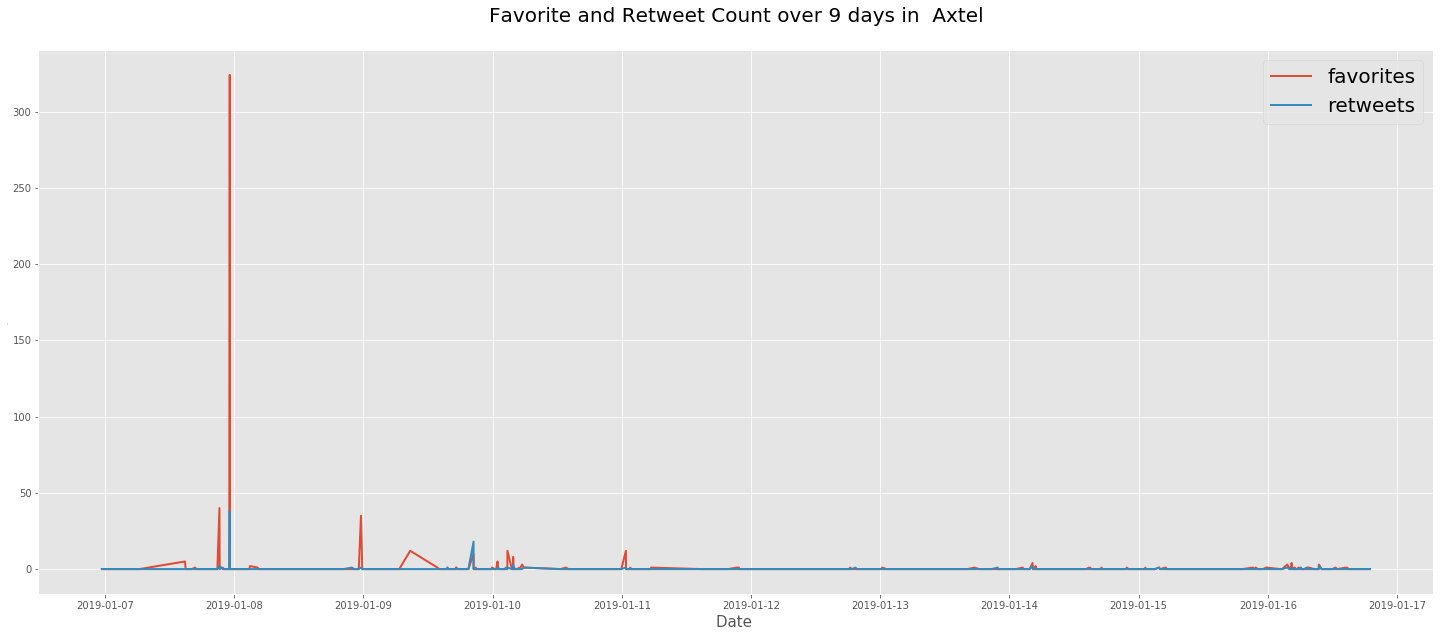

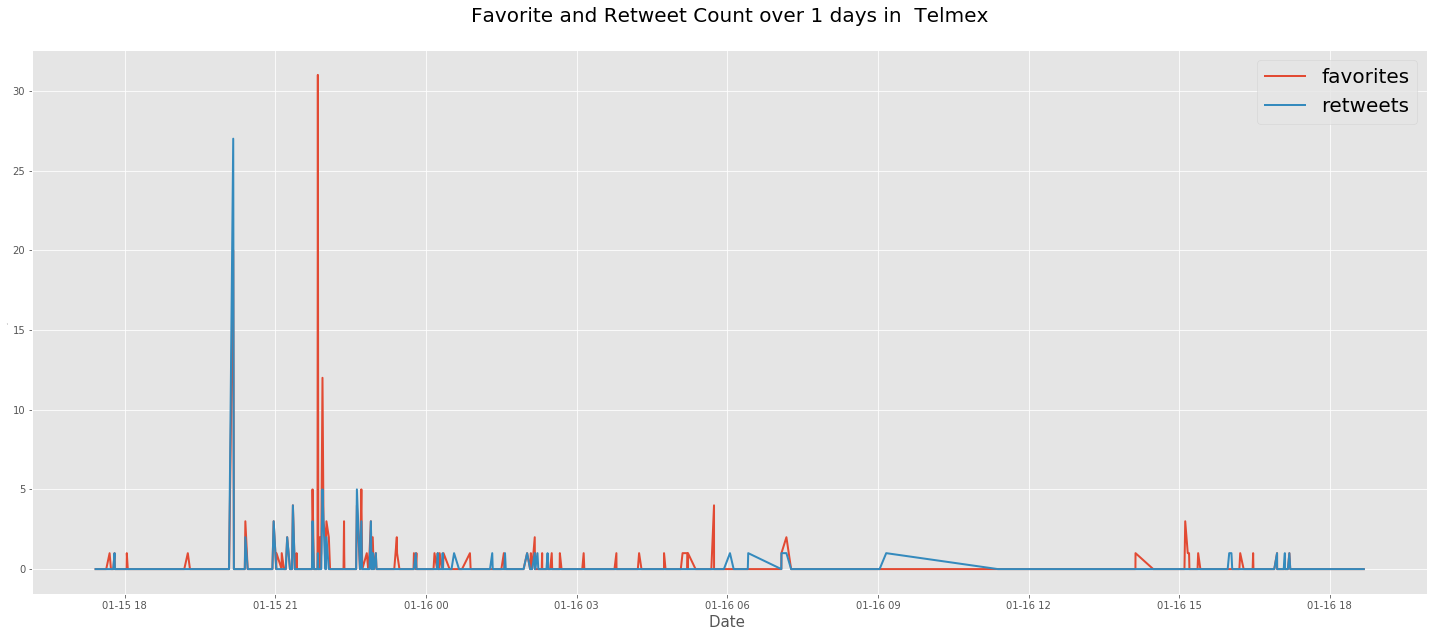

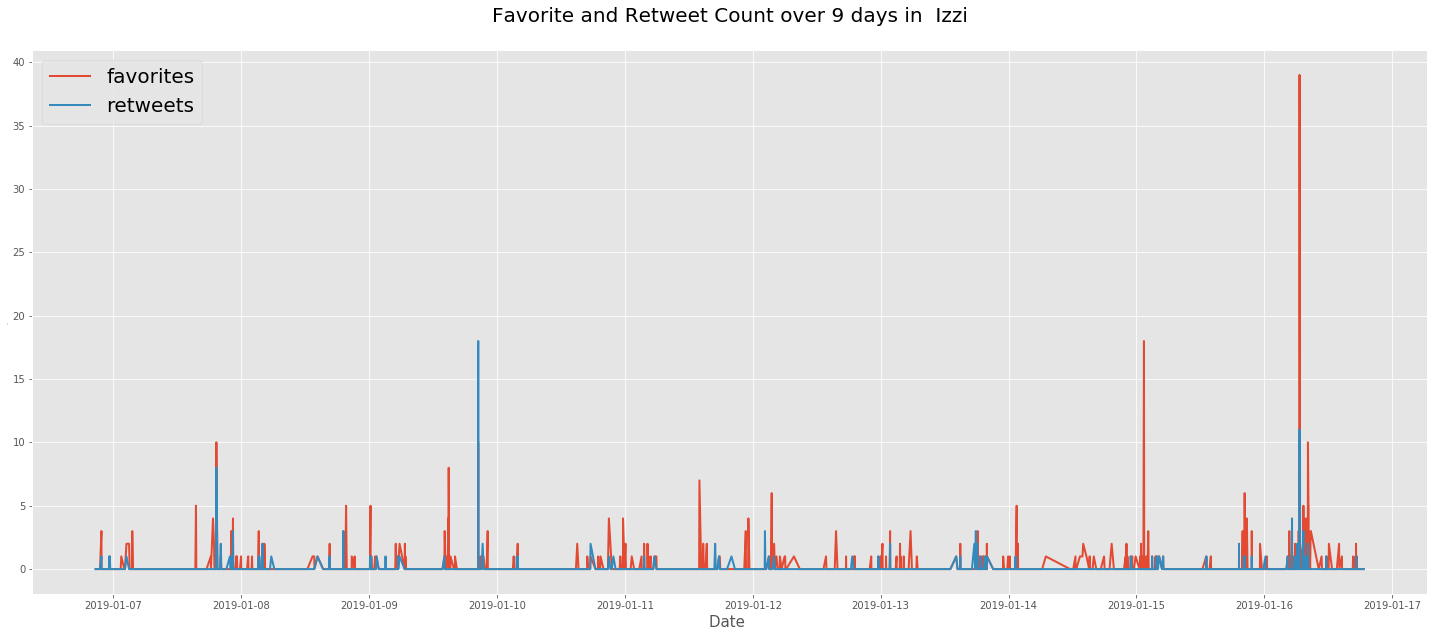

In [2]:
data_frames = [df_totalplay,df_axtel,df_telmex,df_izzi]
ISPs = [" Totalplay"," Axtel"," Telmex"," Izzi"]
for i,j in zip(data_frames, ISPs):
    plt.style.use('ggplot')
    plt.figure(figsize = (25,10))
    
    num_days = (max(i['Date']) - min(i['Date'])).days
    num_months = int(num_days/7)
    
    plt.title('Favorite and Retweet Count over ' + str(num_days) + ' days in ' + j + "\n" , fontsize=20)
    
    plt.xlabel('Date ', fontsize=15)
    plt.ylabel('Count', fontsize=1)
    plt.plot(i['Date'],i['Likes'],label='favorite count', linestyle='-' , linewidth=2)
    plt.plot(i['Date'],i['RTs'],label='retweet count', linestyle='-' , linewidth=2)
    plt.legend(['favorites','retweets'], prop={'size': 20})
    plt.savefig('Favs and RTs by ' + j)

plt.show()


# *FAV's and RT's Part 2*

>Based ond the last graphs i realized that for Axtel was the company where there was a tweet that has 300 favourite count, and Telmex got a tweet that was retweeted around 30 times, let's look a top 5 of those company about fav's and rt's respectively.

In [3]:
# Change base on the Data Frame Company

top_ten_tweets = df_axtel['Likes'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet
twitter_id = "TotalplayAyuda -filter:retweets"    # userid 

print("Top 5 tweets (using favorite count)" + "\n")
for i in range(5):
    index = top_ten_tweets.index[i]
    print(str(i+1) + ")" +"@"+ df_axtel.ix[index]['Screen Name'] + " " + df_axtel.ix[index]['Text'])
    print("Favorite count: " + str(df_axtel.ix[index]['Likes']) + "\n") 

Top 5 tweets (using favorite count)

1)@screamau .@AXTEL_SC hola, me podrían ayudar por MD por favor? Cancele mi servicio hace unos meses y me siguen cobrando servicio que yo no usé🙏🏽 están peor que el FBI mandan mensajes todo el tiempo a celulares, correos, aiuda
Favorite count: 324

2)@patoborghetti Es increíble que llevo 11 minutos y aún ni siquiera me atienden @AXTEL_SC , no me digan que mi llamada es muy importante para ustedes al menos... https://t.co/GLWCmtUPDk
Favorite count: 40

3)@patoborghetti Me rindo @AXTEL_SC ... 20 minutos en el conmutador sin que me atiendan, es lo más que puedo aguantar ... 😫 https://t.co/ECg5igtMb2
Favorite count: 35

4)@genarolozano Gracias @AXTEL_SC ya tengo internet. De verdad les recomiendo el servicio.
Favorite count: 12

5)@AlexLoDj Jamás contraten el servicio de @AXTEL_SC, cobran de más y es el internet mas lento de México
Favorite count: 12



/Users/jahirmunguia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/jahirmunguia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [4]:
# Change base on the Data Frame Company

top_ten_tweets = df_telmex['RTs'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet

print("Top 5 tweets (using favorite count)" + "\n")
for i in range(5):
    index = top_ten_tweets.index[i]
    print(str(i+1) + ")" +"@"+ df_telmex.ix[index]['Screen Name'] + " " + df_telmex.ix[index]['Text'])
    print("RTs count: " + str(df_telmex.ix[index]['RTs']) + "\n") 

Top 5 tweets (using favorite count)

1)@SorPipo Ayer me dejaron plantada los de @TELMEXSoluciona con la mayor tranquilidad que acostumbran, dijeron que vendrían hoy a las 12 aquí estoy como poste esperando a ver si vienen,después de meses y reclamos sin solución, sin poder salir a trabajar ¿ hasta cuando @Telmex  hasta cuando? https://t.co/pU3ODqMUoH
RTs count: 27

2)@Pigmatron_ El consejo del día a todos mis followers: Nunca compren en la tienda en línea de @TELMEXSoluciona, mal servicio  y discriminan a personas con una discapacidad física
RTs count: 5

3)@MagdaGraciasFCH @SorPipo @TELMEXSoluciona @Telmex Te están dando un PÉSIMO servicio de @Telemx, meses sin solucionarte el problema y les sigues pagando 
Debes considerar cambiarte ya de compañía
Qué pasa @arturoelias ?
RTs count: 5

4)@cucebrio1 @SorPipo @TELMEXSoluciona @Telmex 😳😳
Paciencia... paciencia....😱😰😵 https://t.co/PSXCAF7flo
RTs count: 4

5)@marialuisalg1 @SorPipo @TELMEXSoluciona @Telmex Es un pésimo servicio y no sólo d

/Users/jahirmunguia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/jahirmunguia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


# Most used words by users

>For all the datasets i'll exclude some words that normally in spanish it's very common the usage of it, in order to have more accurate information, about the words that significally repeat then i'll graph it. The way that i'll clean the words it'll based on filters, using regular expressions.

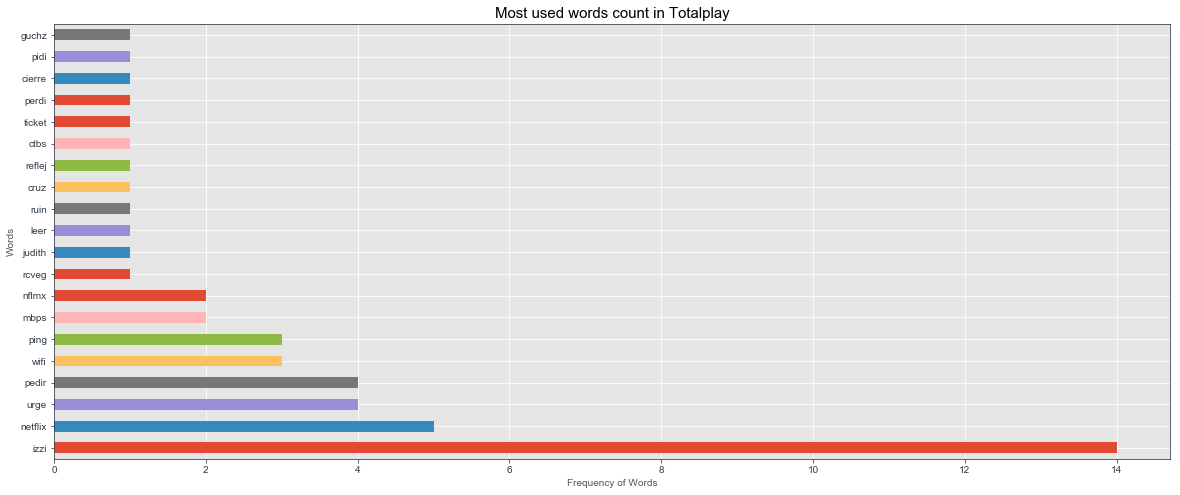

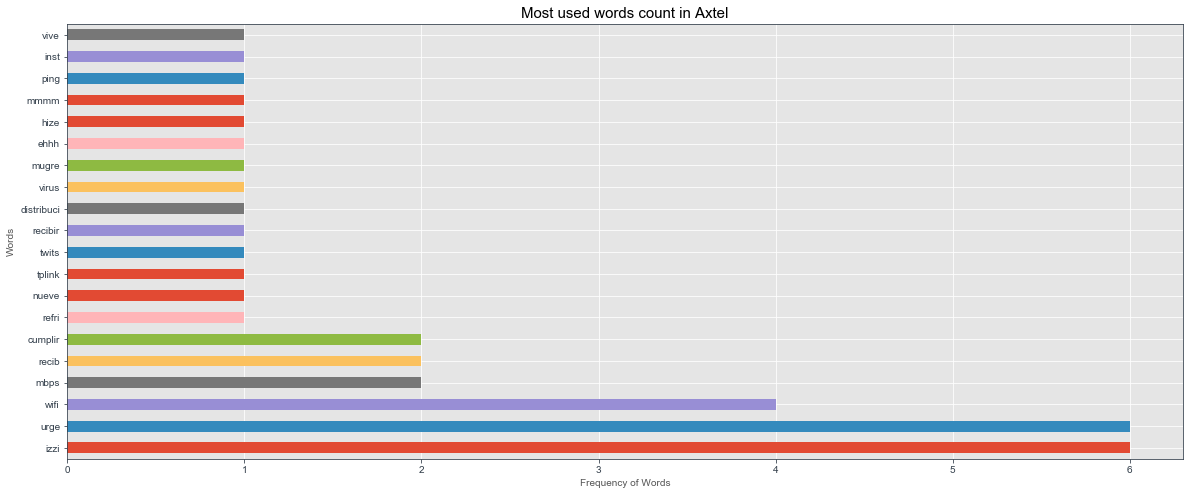

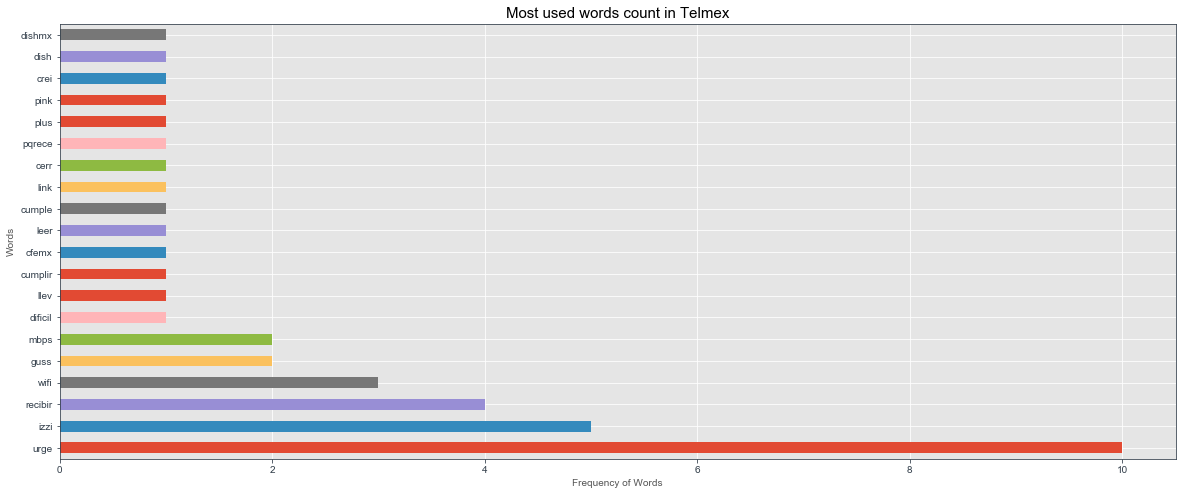

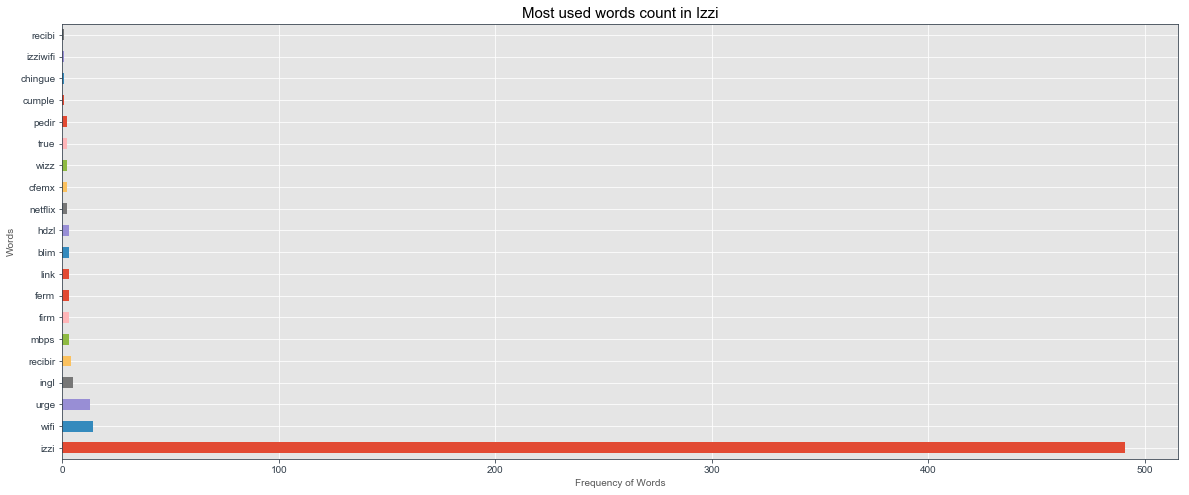

In [5]:
import re # Importing Regular Expression Library

data_frames = [df_totalplay,df_axtel,df_telmex,df_izzi]
ISPs = ['Totalplay','Axtel','Telmex','Izzi']

for i,j in zip(data_frames,ISPs):

    word_series = pd.Series(' '.join(i['Text']).lower().split()) 
    stop_words = ['de','y','en','el','?','un','se','otro','a','tu','eco','show','.','es','pero','completo',',','mi','te',
                  '-','llego','me','que','hicieron','3','lo','15','su','si','jf','ep','qué','con','gusto','he','up','would','should',
                  'do','nos','más','mas','cm','por','no','dm','vs','como','ni','o','mr','ds','br','ver','vez','tu','tú','si','jf','@ift_mx','qué','con','gusto','he','up','would','should',
                  'ms','dice','hice','dije','hola','la','irle','lleg','hice','creer','luis','incre','dure','quiere','urgeeeeeeeeeeeeeeeeeeeeeee']
    
    filt  = list(filter(lambda word: not any(s in word for s in stop_words), word_series)) # filter stop words
    filt = [re.sub('[^a-zA-Z]+', ' ', _) for _ in filt] 
    filt = [re.sub(r'\b\w{1,3}\b', ' ', _) for _ in filt] #words less than 4 chars
    filt = [re.sub(' ', '', _) for _ in filt] #Tabs
    filt = (x for x in filt if x != '') # Spaces
    
    
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    plt.figure(figsize=(20,8))
    
    plt.title('Most used words count in ' + j , fontsize=15)
    
    N = 20
    
    word_freq = pd.Series(filt).value_counts()[:N]          
    word_freq.plot(kind='barh')                               
    
    plt.ylabel('Words', fontsize=10)
    plt.xlabel('Frequency of Words', fontsize=10)
    
    plt.savefig('Words by ' + j)

    
    plt.show()

# Wordcloud

>The visualization for the most used words doesn't like at all, so i found an extension that can represent the data in a better way and all of them together.

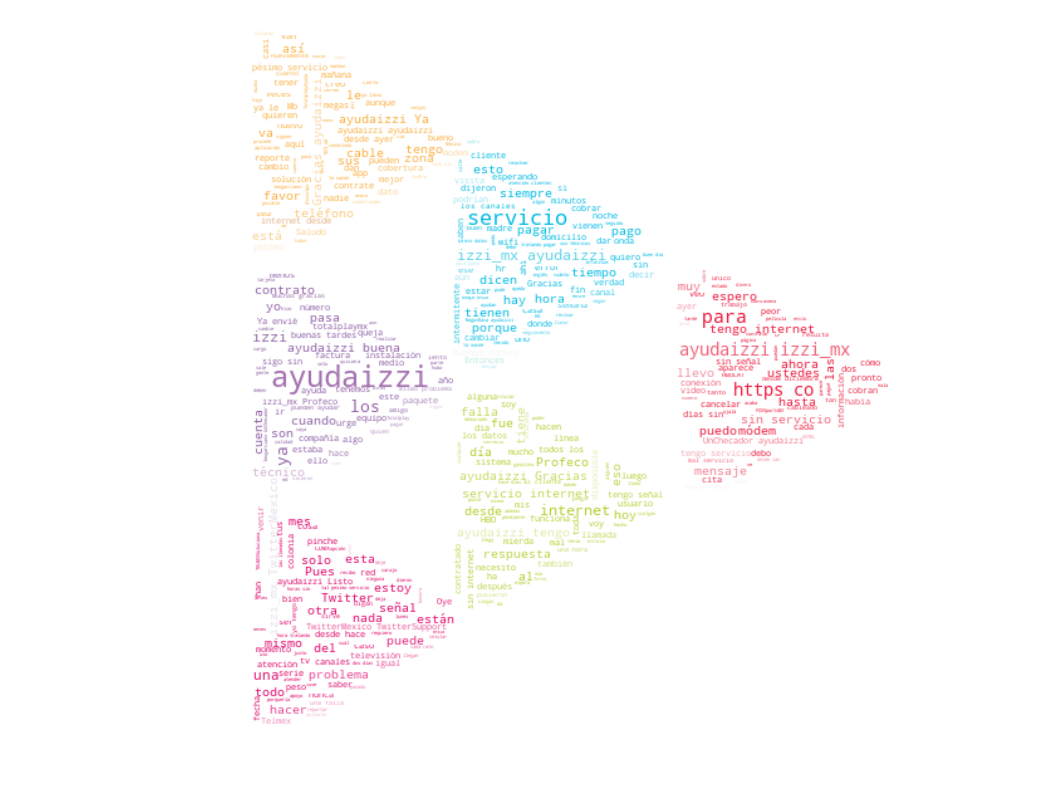

In [6]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, random_color_func


for i,j in zip(data_frames,ISPs):


    text = " ".join(text for text in i.Text)

    #print ("En" + j + "existen {} palabras para twitter".format(len(text)))
    
# Generate a word cloud image

mask = np.array(Image.open("resources/TP.png"))
wordcloud_tp = WordCloud(stopwords=stop_words,background_color="white", mode="RGBA", max_words=5000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[18,18])
plt.imshow(wordcloud_tp.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/WordCloud.png", format="png")

plt.show()

# Sentiment Analysis

>Finally the sentimental analysis, at the beginning i wanted to connecto to a webservice from Google in order to analyze the semantic of a tweet but i didn't had the enough time to perform it, so i choose a library that can work with Python called Textblob, and based in the text of a tweet this will score it, then i'll can clasiffy them as a Neutral, Positive or Negative.

In [7]:
from textblob import TextBlob
import re
import numpy as np 

def limpia_tweet(tweet):
    '''
    Clean the tweet using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analiza_sentimiento(tweet):
    '''
    funtion to clasify the tweet usign textblob
    '''
    analysis = TextBlob(limpia_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
    data_frames = [df_totalplay,df_axtel,df_telmex,df_izzi]

for i in data_frames:

    # Appending the score
    i['Score'] = np.array([ analiza_sentimiento(tweet) for tweet in i['Text'] ])
    
    # Hacemos display de los sentimientos:
    display(i.head(50))
    

,ID,Date,User,Screen Name,Location,Text,Source,Likes,RTs,fecha,weekday,hora,Score
0,1085607041631223809,2019-01-16 18:37:42,Mario Ramirez,mariorp,NaN,@TotalplayAyuda @totalplaymx @Telmex ya envie ...,Twitter Web Client,0,0,2019/01/16,Wednesday,18,0
1,1085602523635945472,2019-01-16 18:19:45,Fernando,fearemid,Puebla,"@TotalplayAyuda buen día, hice una recomendaci...",Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
2,1085601977969594368,2019-01-16 18:17:35,James Axton,chicodelazar,NaN,@TotalplayAyuda ayuda,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
3,1085600565021851648,2019-01-16 18:11:58,Dous,Dous18,NaN,"@TotalplayAyuda hola, ayer mi esposo contrato ...",Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
4,1085600535686696960,2019-01-16 18:11:51,Berenice Verduzco,BereniceVerduz4,"Jalisco, México","@TotalplayAyuda Ok espero no me decepcionen, p...",Twitter for Android,0,0,2019/01/16,Wednesday,18,1
5,1085596601760899073,2019-01-16 17:56:13,Brunoku,Brunoku,NaN,@TotalplayAyuda @LoreAguilarP Si por favor cám...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
6,1085596429467439106,2019-01-16 17:55:32,Axel Pérez Gama,AxelPerezGama,CDMX,@TotalplayAyuda no tengo servicio de Totalplay...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
7,1085593778444890112,2019-01-16 17:45:00,Berenice Verduzco,BereniceVerduz4,"Jalisco, México",@TotalplayAyuda estoy sin servicio desde hace ...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
8,1085591058208108544,2019-01-16 17:34:12,Luis Salvador C.,salvadorl_1,México,.@TotalplayAyuda Hola! Quisiera saber por cuán...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
9,1085588669791174657,2019-01-16 17:24:42,Carl MX,oespc,CDMX,@TotalplayAyuda @totalplaymx Y que me conteste...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0


,ID,Date,User,Screen Name,Location,Text,Source,Likes,RTs,fecha,weekday,hora,Score
0,1085612406972256256,2019-01-16 18:59:02,David CN,davidbna,Ciudad de México,@AXTEL_SC no me dejan contratar servicio por t...,Twitter Web Client,0,0,2019/01/16,Wednesday,18,0
1,1085606490029916160,2019-01-16 18:35:31,Hector Palacios,Lordjaibo,Mexico,@RulHack @Twitter @AXTEL_SC Pero esta bien Ing?,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
2,1085602218840080384,2019-01-16 18:18:33,Kiu,cipons,"México, DF",@AXTEL_SC Pésimo servicio al cliente. No se ha...,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
3,1085600809838997504,2019-01-16 18:12:57,Bri,i_bri,Kokiri Forest,"@MariePrGut @AXTEL_SC Woah, nunca me había pasado",Falcon Pro 2015 BETA,0,0,2019/01/16,Wednesday,18,0
4,1085598818283020288,2019-01-16 18:05:02,Be,belem_merino,NaN,"@AXTEL_SC Qué detallazo. \nNo, de momento ya n...",Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
5,1085596443174469635,2019-01-16 17:55:36,Mauricio Molina,mauchopper,Mexico city,@AXTEL_SC Es un robo totalllll... esto no se q...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
6,1085594428750942209,2019-01-16 17:47:35,Vero Gallardo Oficial,VeroGallardo_1,NaN,@AXTEL_SC hola xfa les mande MD mi internet es...,Twitter for iPhone,0,0,2019/01/16,Wednesday,17,0
7,1085592563841748992,2019-01-16 17:40:11,julio cv,tuco_wallach,México,@AXTEL_SC total incapacidad para reconicer que...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
8,1085592333113090048,2019-01-16 17:39:16,julio cv,tuco_wallach,México,@AXTEL_SC creen que soy estúpido? Ayer levanté...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
9,1085588818831556608,2019-01-16 17:25:18,fernanda lara,fernand92917065,NaN,@AXTEL_SC ya van 3 veces seguidos que me dan f...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0


,ID,Date,User,Screen Name,Location,Text,Source,Likes,RTs,fecha,weekday,hora,Score
0,1085607755052998656,2019-01-16 18:40:33,Pao Garcia,PauGarj,NaN,@andylavaquerita @TELMEXSoluciona Jajajajajaja...,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
1,1085607010303991809,2019-01-16 18:37:35,CIC Puebla,CICPue,"Puebla, Puebla",*INSPECTOR* Poste dañado en Calle de la 27 Nor...,TweetDeck,0,0,2019/01/16,Wednesday,18,0
2,1085606940443463680,2019-01-16 18:37:18,Adriana Ortiz,adriortsol,NaN,@TELMEXSoluciona Gracias ya les pase toda la i...,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
3,1085606735178579970,2019-01-16 18:36:29,el señor de los aigres,H_cabrera_r8,NaN,@TELMEXSoluciona sin internet desde temprano y...,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
4,1085606732670386176,2019-01-16 18:36:29,david,undannafan,"Monterrey, Nuevo León",@TELMEXSoluciona Ya estoy en el domicilio qued...,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
5,1085604805907750914,2019-01-16 18:28:49,aleѕιтalore™,Arejandera,NaN,"@TELMEXSoluciona Quedó en espera, saludos",Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
6,1085604234203140097,2019-01-16 18:26:33,Brody Reyes,brody_reyes,NaN,@TELMEXSoluciona una hora no hacen ni aran ni ...,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
7,1085604216956248064,2019-01-16 18:26:29,aleѕιтalore™,Arejandera,NaN,@TELMEXSoluciona Sigo en espera de sus comenta...,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
8,1085603406985814016,2019-01-16 18:23:16,Gabo (Pedidos OFF),amazing_gabo,NaN,@TELMEXSoluciona Me pqrece perfecto,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
9,1085602513997516800,2019-01-16 18:19:43,kike on a leash,kikeleash,No me hallo (Hidalgo-DF),@TELMEXSoluciona telefono telmex 772 727 2942\...,TweetDeck,0,0,2019/01/16,Wednesday,18,0


,ID,Date,User,Screen Name,Location,Text,Source,Likes,RTs,fecha,weekday,hora,Score
0,1085607858547367938,2019-01-16 18:40:57,MIRIAM JAIMES,mitwy,MEXICO,@leogarciamx @ayudaizzi @izzi_mx Gracias!! Que...,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
1,1085607838330863616,2019-01-16 18:40:52,Sara 👑💕,iYeliiC,NaN,@ARTUROREZA @ayudaizzi Espero se pueda resolve...,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
2,1085601815352303617,2019-01-16 18:16:56,ARTURO REYNA ZAMBRAN,ARTUROREZA,"Monterrey, Nuevo León",@iYeliiC @ayudaizzi no te hagas muchas ilusion...,Twitter Web Client,0,0,2019/01/16,Wednesday,18,0
3,1085601566365749248,2019-01-16 18:15:57,Sara 👑💕,iYeliiC,NaN,@ayudaizzi Muchas gracias! Ya lo mande 🙂,Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
4,1085600658303139840,2019-01-16 18:12:21,Pedriin,PeDriink11,Ciudad de México,@iYeliiC @ayudaizzi Pues ya paga...,Twitter for Android,0,0,2019/01/16,Wednesday,18,0
5,1085599774521344006,2019-01-16 18:08:50,Sara 👑💕,iYeliiC,NaN,"Hola ! Me podrían ayudar, es que no tengo seña...",Twitter for iPhone,0,0,2019/01/16,Wednesday,18,0
6,1085597894298791936,2019-01-16 18:01:22,Nowhere Girl,FernandaCen,Pepperland,"@ayudaizzi Si, es correcto",Twitter for Android,0,0,2019/01/16,Wednesday,18,0
7,1085595596759523328,2019-01-16 17:52:14,Noé Morales Muñoz,NoeMoralesMunoz,NaN,"@ayudaizzi Ya lo envíe, espero que su respuest...",Twitter for Android,0,0,2019/01/16,Wednesday,17,0
8,1085593632449515522,2019-01-16 17:44:25,Noé Morales Muñoz,NoeMoralesMunoz,NaN,@ayudaizzi Está caído el servicio de TV e inte...,Twitter for Android,0,0,2019/01/16,Wednesday,17,0
9,1085588943322693632,2019-01-16 17:25:48,ARTURO REYNA ZAMBRAN,ARTUROREZA,"Monterrey, Nuevo León",@ayudaizzi pesimo servicio y eso q aun no empe...,Twitter Web Client,0,0,2019/01/16,Wednesday,17,0


In [8]:
#####################
#     TOTALPLAY     #
#####################

tweets_positivos_totalplay = [ tweet for index, tweet in enumerate(df_totalplay['Text']) if df_totalplay['Score'][index] > 0]
tweets_neutros_totalplay   = [ tweet for index, tweet in enumerate(df_totalplay['Text']) if df_totalplay['Score'][index] == 0]
tweets_negativos_totalplay = [ tweet for index, tweet in enumerate(df_totalplay['Text']) if df_totalplay['Score'][index] < 0]
print("Totalplay ______________________________________ \n")
print("Porcentaje de tweets positivos en totalplay: {}%".format(round(len(tweets_positivos_totalplay)*100/len(df_totalplay['Text']))))
print("Porcentaje de tweets neutros en totalplay: {}%".format(round(len(tweets_neutros_totalplay)*100/len(df_totalplay['Text']))))
print("Porcentaje de tweets negativos en totalplay: {}%".format(round(len(tweets_negativos_totalplay)*100/len(df_totalplay['Text']))))


#####################
#     AXTEL     #
#####################
print("\nAxtel ______________________________________ \n")
tweets_positivos_axtel = [ tweet for index, tweet in enumerate(df_axtel['Text']) if df_axtel['Score'][index] > 0]
tweets_neutros_axtel   = [ tweet for index, tweet in enumerate(df_axtel['Text']) if df_axtel['Score'][index] == 0]
tweets_negativos_axtel = [ tweet for index, tweet in enumerate(df_axtel['Text']) if df_axtel['Score'][index] < 0]
print("Porcentaje de tweets positivos en axtel: {}%".format(round(len(tweets_positivos_axtel)*100/len(df_axtel['Text']))))
print("Porcentaje de tweets neutros en axtel: {}%".format(round(len(tweets_neutros_axtel)*100/len(df_axtel['Text']))))
print("Porcentaje de tweets negativos en axtel: {}%".format(round(len(tweets_negativos_axtel)*100/len(df_axtel['Text']))))


#####################
#     TELMEX     #
#####################

print("\nTelmex ______________________________________ \n")
tweets_positivos_telmex = [ tweet for index, tweet in enumerate(df_telmex['Text']) if df_telmex['Score'][index] > 0]
tweets_neutros_telmex   = [ tweet for index, tweet in enumerate(df_telmex['Text']) if df_telmex['Score'][index] == 0]
tweets_negativos_telmex = [ tweet for index, tweet in enumerate(df_telmex['Text']) if df_telmex['Score'][index] < 0]
print("Porcentaje de tweets positivos en telmex: {}%".format(round(len(tweets_positivos_telmex)*100/len(df_telmex['Text']))))
print("Porcentaje de tweets neutros en telmex: {}%".format(round(len(tweets_neutros_telmex)*100/len(df_telmex['Text']))))
print("Porcentaje de tweets negativos en telmex: {}%".format(round(len(tweets_negativos_telmex)*100/len(df_telmex['Text']))))


#####################
#     IZZI     #
#####################

print("\nIZZI ______________________________________ \n")
tweets_positivos_izzi = [ tweet for index, tweet in enumerate(df_izzi['Text']) if df_izzi['Score'][index] > 0]
tweets_neutros_izzi   = [ tweet for index, tweet in enumerate(df_izzi['Text']) if df_izzi['Score'][index] == 0]
tweets_negativos_izzi = [ tweet for index, tweet in enumerate(df_izzi['Text']) if df_izzi['Score'][index] < 0]
print("Porcentaje de tweets positivos en izzi: {}%".format(round(len(tweets_positivos_izzi)*100/len(df_izzi['Text']))))
print("Porcentaje de tweets neutros en izzi: {}%".format(round(len(tweets_neutros_izzi)*100/len(df_izzi['Text']))))
print("Porcentaje de tweets negativos en izzi: {}%".format(round(len(tweets_negativos_izzi)*100/len(df_izzi['Text']))))


Totalplay ______________________________________ 

Porcentaje de tweets positivos en totalplay: 3%
Porcentaje de tweets neutros en totalplay: 95%
Porcentaje de tweets negativos en totalplay: 2%

Axtel ______________________________________ 

Porcentaje de tweets positivos en axtel: 4%
Porcentaje de tweets neutros en axtel: 94%
Porcentaje de tweets negativos en axtel: 2%

Telmex ______________________________________ 

Porcentaje de tweets positivos en telmex: 3%
Porcentaje de tweets neutros en telmex: 97%
Porcentaje de tweets negativos en telmex: 1%

IZZI ______________________________________ 

Porcentaje de tweets positivos en izzi: 3%
Porcentaje de tweets neutros en izzi: 96%
Porcentaje de tweets negativos en izzi: 2%


# Graphic Sentiment Analysis

>I dare to say that this Library are not so accurate with the spanish and in order to se more clearly the data i'll make a bar graph just for the Positive/Negative Tweets.

<Figure size 576x576 with 0 Axes>

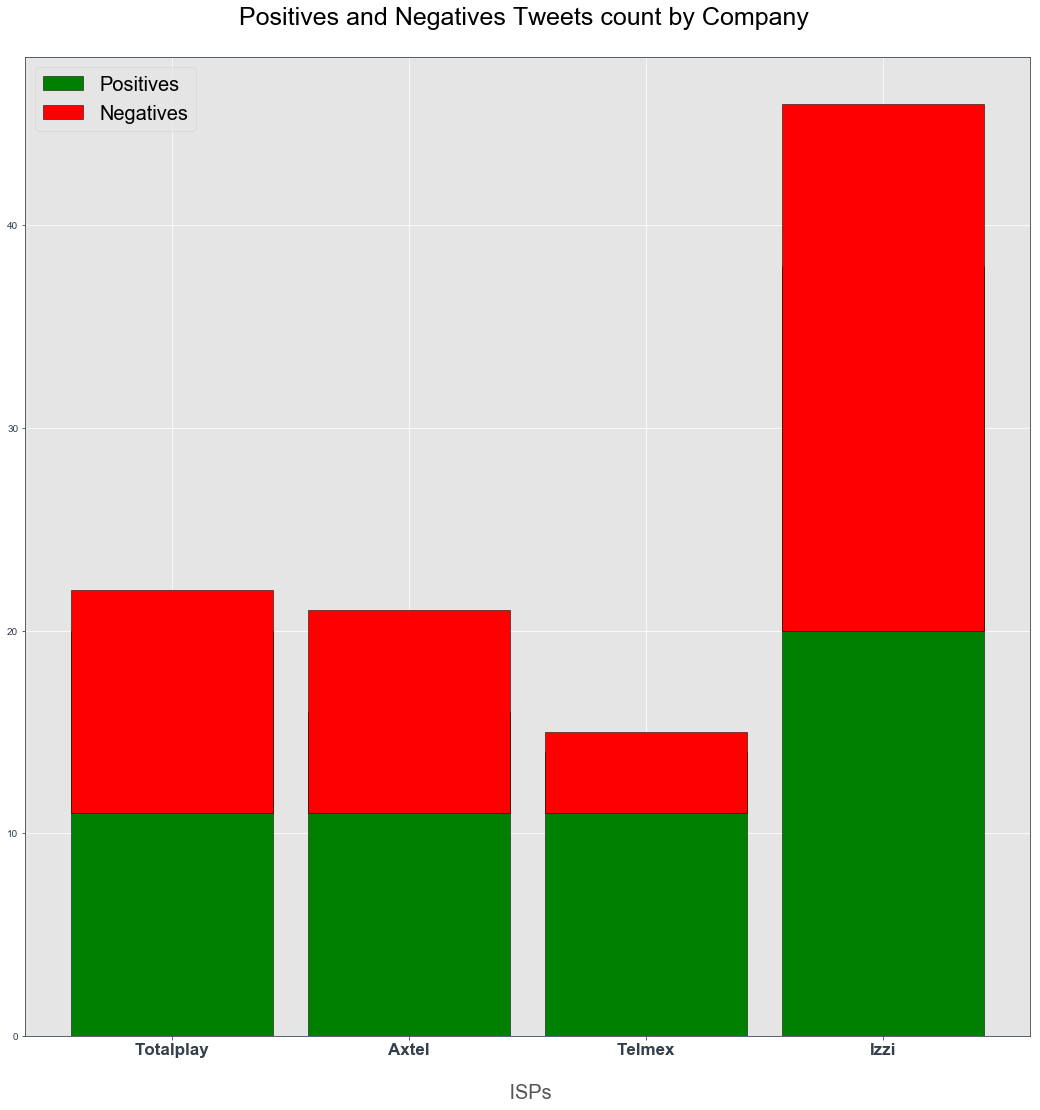

In [9]:
import matplotlib.pyplot as plt

r = [0]
m = [1]
x = [2]
z = [3]

plt.figure(figsize=[8,8])

totals = len(tweets_positivos_totalplay) + len(tweets_negativos_totalplay) + len(tweets_neutros_totalplay)

b = len(tweets_neutros_totalplay)
g = len(tweets_positivos_totalplay)
re = len(tweets_negativos_totalplay)

b_1 = len(tweets_neutros_axtel)
g_1 = len(tweets_positivos_axtel)
re_1 = len(tweets_negativos_axtel)

b_2 = len(tweets_neutros_telmex)
g_2 = len(tweets_positivos_telmex)
re_2 = len(tweets_negativos_telmex)

b_3 = len(tweets_neutros_izzi)
g_3 = len(tweets_positivos_izzi)
re_3 = len(tweets_negativos_izzi)

plt.figure(figsize=[18,18])

# plot
barWidth = 0.85


# Create green Bars
#neutro = plt.bar(r, b, color='#2946ae', edgecolor = 'black' ,width=barWidth)
# Create orange Bars
positivo = plt.bar(r, g,  color='green', edgecolor = 'black', width=barWidth)
# Create blue Bars
negativo = plt.bar(r, re,  color='red',bottom = re, edgecolor = 'black',width=barWidth)


# Create green Bars
#neutro_1 = plt.bar(m, b_1, color='#2946ae', edgecolor = 'black' ,width=barWidth)
# Create orange Bars
positivo_1 = plt.bar(m, g_1,  color='green', edgecolor = 'black', width=barWidth)
# Create blue Bars
negativo_1 = plt.bar(m, re_1,  color='red',bottom = re, edgecolor = 'black',width=barWidth)



# Create green Bars
#neutro_2 = plt.bar(x, b_2, color='#2946ae', edgecolor = 'black' ,width=barWidth)
# Create orange Bars
positivo_2 = plt.bar(x, g_2,  color='green', edgecolor = 'black', width=barWidth)
# Create blue Bars
negativo_2 = plt.bar(x, re_2,  color='red',bottom = re, edgecolor = 'black',width=barWidth)



# Create green Bars
#neutro_3 = plt.bar(z, b_3, color='#2946ae', edgecolor = 'black' ,width=barWidth)
# Create orange Bars
positivo_3 = plt.bar(z, g_3,  color='green', edgecolor = 'black', width=barWidth)
# Create blue Bars
negativo_3 = plt.bar(z, re_3,  color='red',bottom = g, edgecolor = 'black',width=barWidth)

bars = ('Totalplay', 'Axtel', 'Telmex', 'Izzi')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, fontweight='bold', fontsize='17', horizontalalignment='center')
plt.locator_params(axis = 'x', nbins = 6)
plt.xlabel("\n ISPs" , fontsize=20)
plt.legend(['Positives','Negatives'], prop={'size': 20})

plt.title('Positives and Negatives Tweets count by Company \n', fontsize=25)
plt.savefig("images/Positives and Negatives Tweets count by Company.png", format="png")
    
# Show graphic
plt.show()


# Peak Users Usage

>Is very usefull to know the behavior of the users i mean at that time and when the users are tweeting.

647
Plotting Graph..


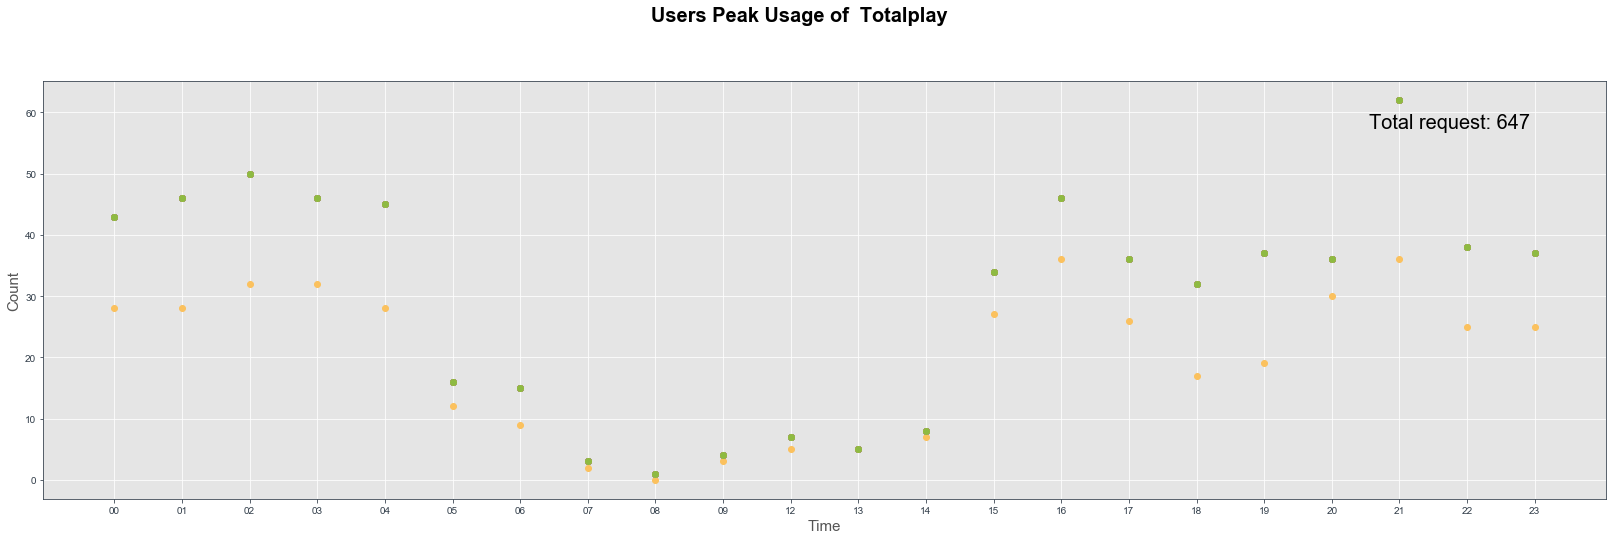

443
Plotting Graph..


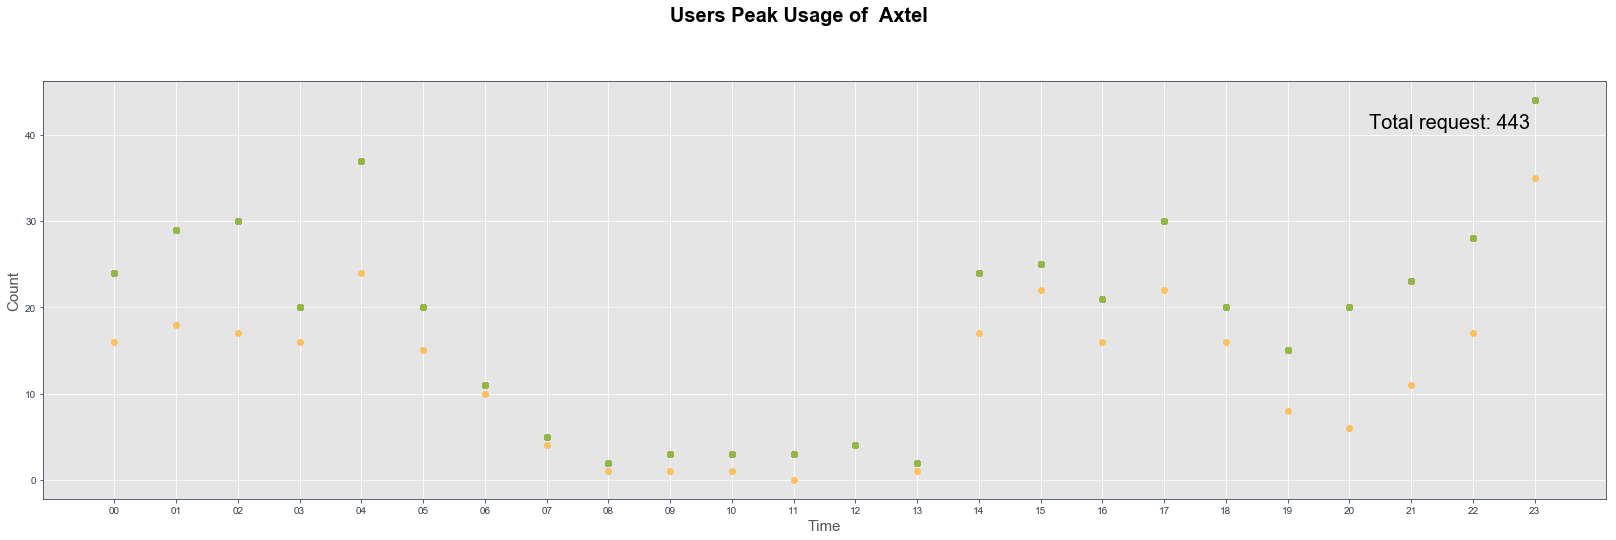

525
Plotting Graph..


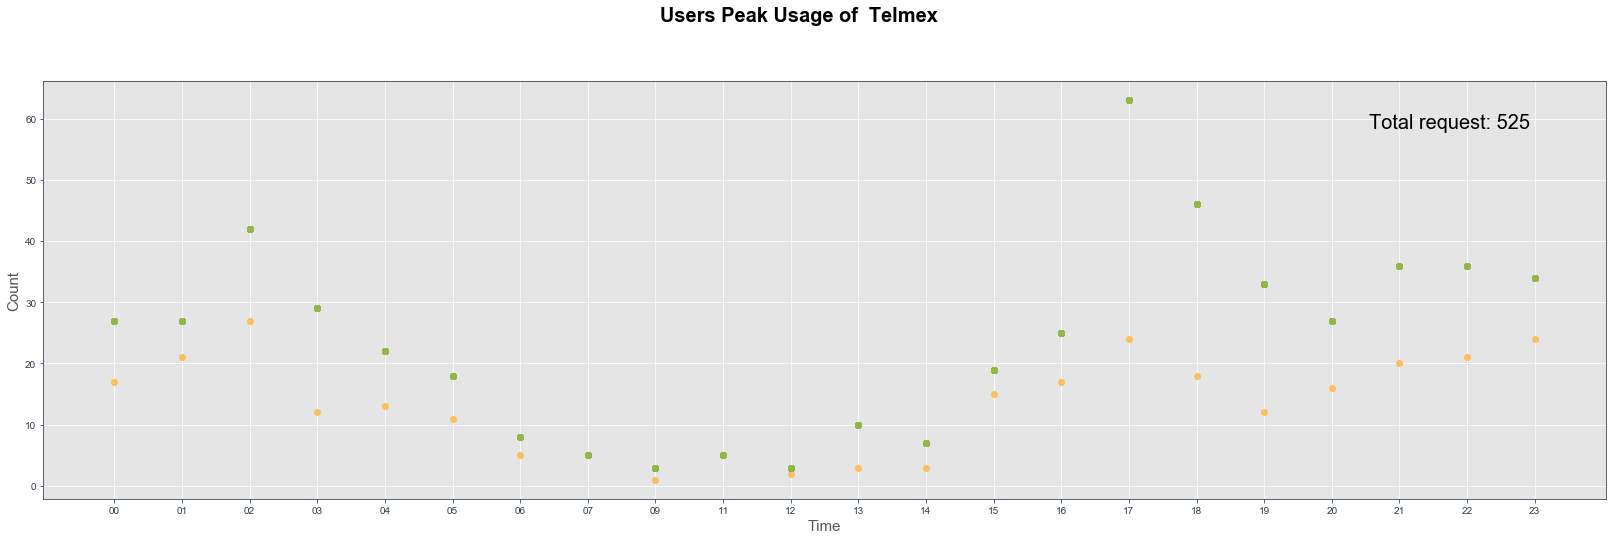

1464
Plotting Graph..


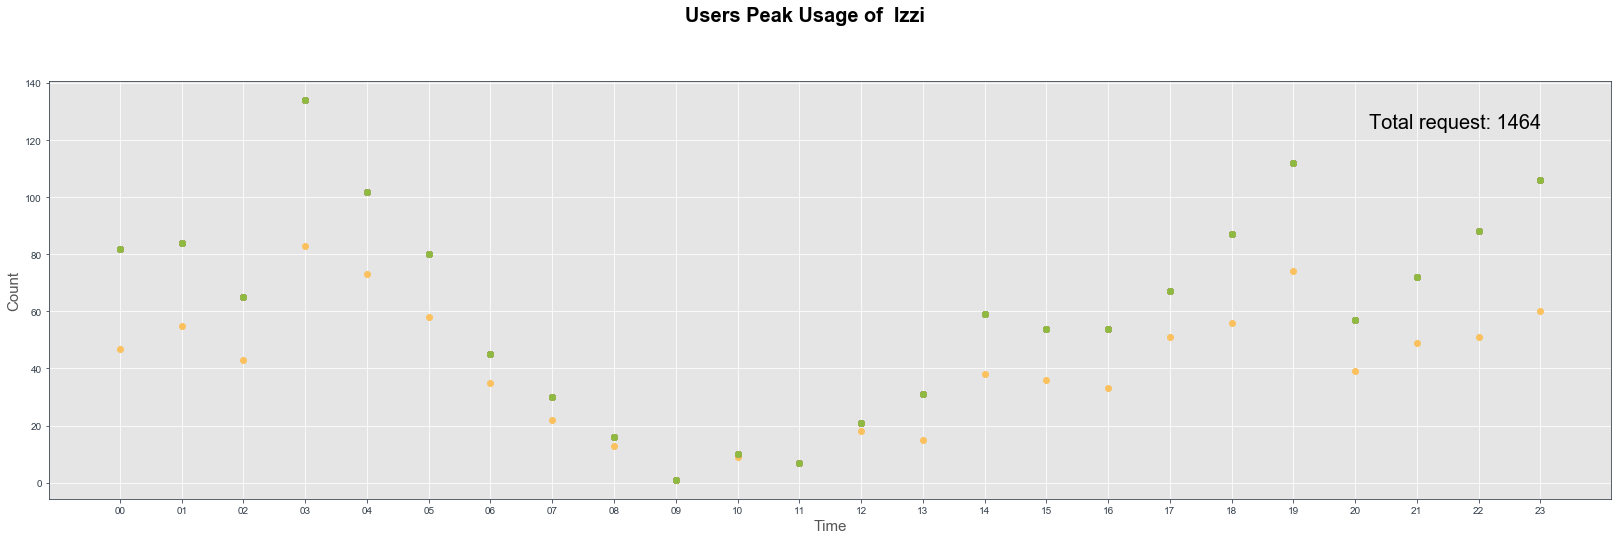

In [17]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

dataframes = [df_totalplay,df_axtel,df_telmex,df_izzi]
isps = ["Totalplay","Axtel","Telmex","Izzi"]

for i,j in zip(dataframes,isps):
    df = i
    # Create an array of 1's using Numpy
    count = df.Source.size
    print(count)
    ones = np.ones(count, dtype=int)
    # Add the ones array to the DataFrame with the header "Counts"
    df['Counts'] = ones

    grouped = df.groupby('hora').count()

    total_req =  'Total request: ' + str(count)
   

    # x and y axis values are extracted from the grouped DataFrame
    x = grouped.index
    y = grouped.values

    print ('Plotting Graph..')
    fig = plt.figure(figsize=[28,8])
    fig.suptitle('Users Peak Usage of  ' + j, fontsize=20, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)

    ax.set_xlabel('Time', fontsize=15)
    ax.set_ylabel('Count', fontsize=15)

    text_x_axis_value = 0.9
    
    ax.text(text_x_axis_value, 0.90, total_req, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize=20)
 
    ax.plot_date(x, y, xdate=True, ydate=False)
    plt.savefig('Users Peak Usage of' + j)
    
    plt.show()